In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical



In [59]:
# Tải dữ liệu MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# In kích thước mảng
print("Train images:", x_train.shape)
print("Train labels:", y_train.shape)
print("Test images:", x_test.shape)
print("Test labels:", y_test.shape)


Train images: (60000, 28, 28)
Train labels: (60000,)
Test images: (10000, 28, 28)
Test labels: (10000,)


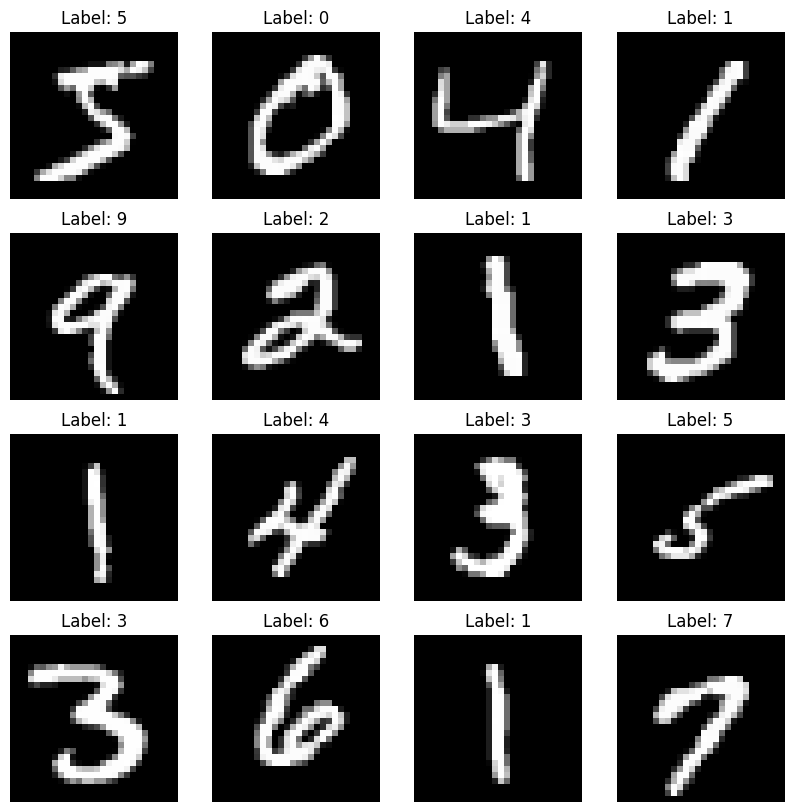

In [60]:
plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()


In [61]:
# Chia x_train thành train và validation
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.2, stratify=y_train, random_state=42
)


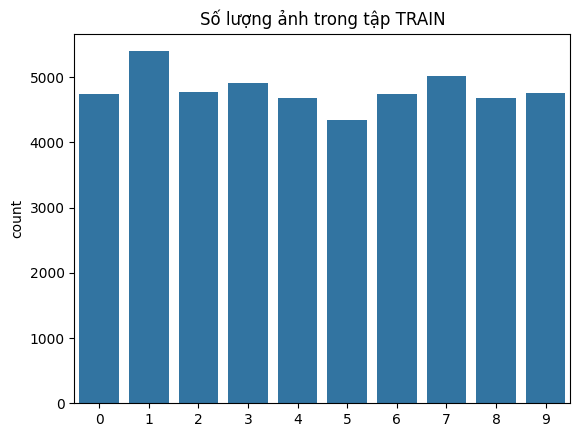

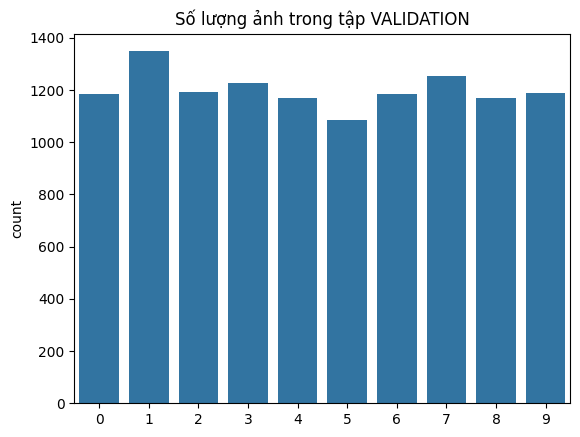

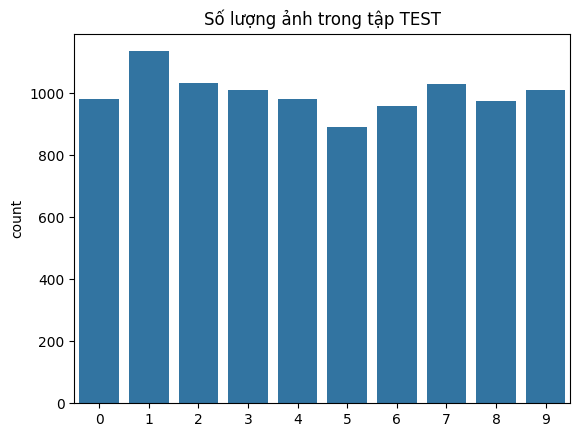

In [62]:

import seaborn as sns
import matplotlib.pyplot as plt

# Nếu đang dùng dữ liệu chưa one-hot, bạn có thể vẽ ngay:
# Sử dụng trực tiếp y_train, y_val, y_test vì chúng là mảng 1 chiều chứa nhãn số
sns.countplot(x=y_train)
plt.title("Số lượng ảnh trong tập TRAIN")
plt.show()

sns.countplot(x=y_val)
plt.title("Số lượng ảnh trong tập VALIDATION")
plt.show()

sns.countplot(x=y_test)
plt.title("Số lượng ảnh trong tập TEST")
plt.show()

In [63]:
from tensorflow.keras.utils import to_categorical

# Reshape và chuẩn hóa
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255
x_val   = x_val.reshape(-1, 28, 28, 1).astype('float32') / 255
x_test  = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255

# One-hot encoding
y_train = to_categorical(y_train, 10)
y_val   = to_categorical(y_val, 10)
y_test  = to_categorical(y_test, 10)


In [64]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,578 (396.79 KB)

 Trainable params: 101,578 (396.79 KB)

 Non-trainable params: 0 (0.00 B)

In [65]:
batch_size = 32
epochs = 20

history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val),
    verbose=1
)


Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.8532 - loss: 0.4805 - val_accuracy: 0.9655 - val_loss: 0.1201
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9751 - loss: 0.0816 - val_accuracy: 0.9807 - val_loss: 0.0647
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9840 - loss: 0.0543 - val_accuracy: 0.9857 - val_loss: 0.0523
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9874 - loss: 0.0416 - val_accuracy: 0.9830 - val_loss: 0.0558
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9893 - loss: 0.0328 - val_accuracy: 0.9852 - val_loss: 0.0487
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9924 - loss: 0.0225 - val_accuracy: 0.9818 - val_loss: 0.0592
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9937 - loss: 0.0200 - val_accuracy: 0.9858 - val_loss: 0.0489
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9942 - loss: 0.0184 -

In [66]:
loss, acc = model.evaluate(x_test, y_test)
print(f"Độ chính xác trên tập test: {acc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9796 - loss: 0.1369
Độ chính xác trên tập test: 0.9839


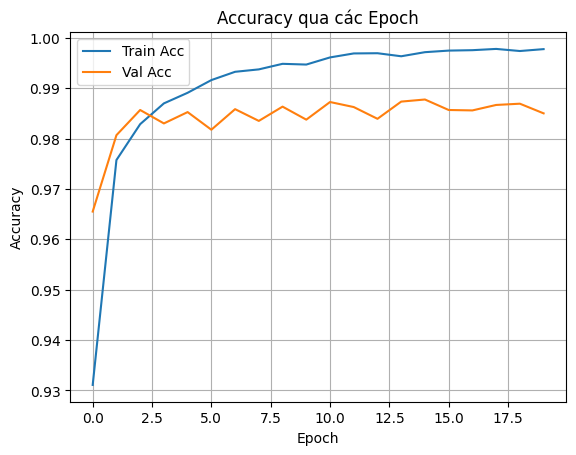

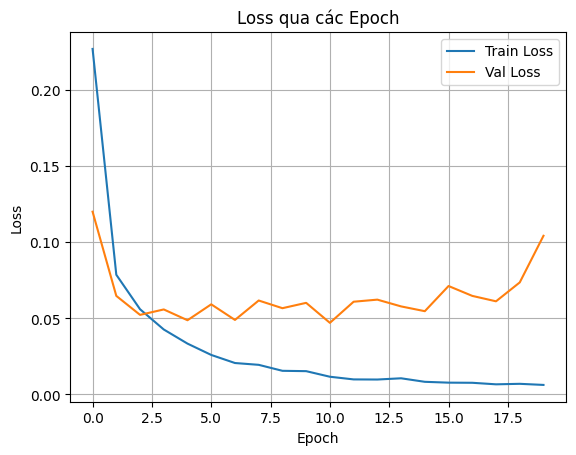

In [67]:
# Accuracy
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy qua các Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss qua các Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
Dự đoán là: 7


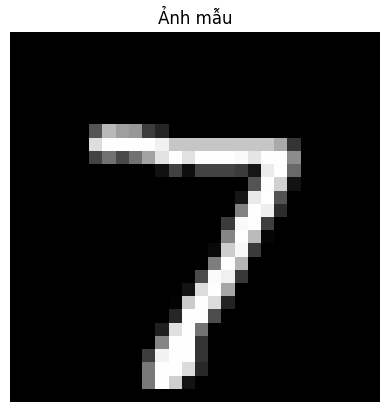

In [68]:
import numpy as np

# Lấy ảnh đầu tiên từ tập test
sample = x_test[0].reshape(1, 28, 28, 1)
pred = model.predict(sample)

print("Dự đoán là:", np.argmax(pred))

# Hiển thị ảnh
plt.imshow(x_test[0].reshape(28, 28), cmap='gray')
plt.title("Ảnh mẫu")
plt.axis('off')
plt.show()
